In [1]:
import numpy as np
import sympy as sp
import handcalcs.render
import forallpeople as si
import matplotlib.pyplot as plt
from math import tan, sin,cos, pi, radians, sqrt, trunc
from IPython.display import display, Markdown
si.environment('thermal', top_level=True)

In [2]:
def Fire_load(building_type):
    # Fire load densities according to EN 1991-1-2 DK Annex
    if building_type == 'hospital' or building_type == 'cinema' or building_type == 'lecture hall':
        q = 150  # MJ/m^2
    elif building_type == 'office' or building_type == 'residence':
        q = 200  # MJ/m^2
    elif building_type == 'car park':
        q = 300  # MJ/m^2
    else:
        raise ValueError("Please input a valid building type")
    return q*10**6*J_m2

<h4>Fuel load density</h4>

In [3]:
q = Fire_load('car park')

In [4]:
%%render 2
q

<IPython.core.display.Latex object>

<h4>Opening factor</h4>

Enclosure area

* Add picture of corner

In [5]:
%%render param 2
#Area of the "cube" of the compartment

B = 10*m
L = 25.5/2*m
H = 2.2*m


<IPython.core.display.Latex object>

In [6]:
%%render 2

A_t = 2*(B*L + B*H + L*H)
A_f = B*L

<IPython.core.display.Latex object>

In [7]:
%%render 2

O = (0.02*m**0.5).prefix('unity')

<IPython.core.display.Latex object>

<h4>Thermal inertia</h4>

In [8]:
%%render 2

b = (1160*W_m_K*s**0.5/m)

<IPython.core.display.Latex object>

In [9]:
def gamma_f(O,b):
    return (O.value/0.04/(b.value/1160))**2

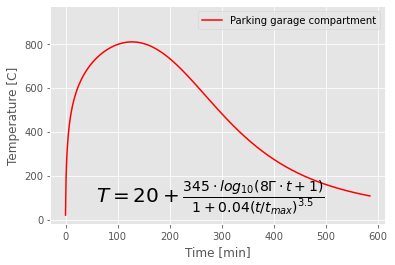

In [10]:
t_max = 0.0078*(q.value/10**6)/O.value
t = np.arange(0,t_max*5)
T = 20+345*np.log10(8*gamma_f(O,b)*t+1)/(1+0.04*(t/t_max)**3.5)
T_max = T.max()
plt.style.use('ggplot')
plt.plot(t,T, label="Parking garage compartment", color = 'red')
plt.ylim(ymax=max(T)*1.2)
plt.legend()
plt.xlabel("Time [min]")
plt.ylabel("Temperature [C]")
plt.text(0.5 * (0 + t_max), 0.1 * (0 + T_max),
     r"$T=20 + \frac{345\cdot log_{10}(8\Gamma \cdot t+1)}{1+0.04(t/t_{max})^{3.5}}$", horizontalalignment='left',
     fontsize=20)
plt.show()

In [14]:
T_max*dC, t_max*minute

(808.245 °C, 117.000 minutes)